<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Imports" data-toc-modified-id="Imports-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Imports</a></span></li><li><span><a href="#In-a-loop-on-real-data-now" data-toc-modified-id="In-a-loop-on-real-data-now-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>In a loop on real data now</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Data-Prep-for-Vanilla-Regression" data-toc-modified-id="Data-Prep-for-Vanilla-Regression-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Data Prep for Vanilla Regression</a></span></li><li><span><a href="#Flexible-Regression-model" data-toc-modified-id="Flexible-Regression-model-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Flexible Regression model</a></span></li><li><span><a href="#Accuracy-with-old-data" data-toc-modified-id="Accuracy-with-old-data-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Accuracy with old data</a></span></li></ul></li><li><span><a href="#Together-with-new-Files" data-toc-modified-id="Together-with-new-Files-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Together with new Files</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Columns-with-new-data" data-toc-modified-id="Correlation-of-Columns-with-new-data-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Correlation of Columns with new data</a></span></li><li><span><a href="#Data-Prep-for-Vanilla-Regression" data-toc-modified-id="Data-Prep-for-Vanilla-Regression-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Data Prep for Vanilla Regression</a></span></li><li><span><a href="#Flexible-Regression-model" data-toc-modified-id="Flexible-Regression-model-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Flexible Regression model</a></span></li><li><span><a href="#Accuracy-with-new-data" data-toc-modified-id="Accuracy-with-new-data-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>Accuracy with new data</a></span></li></ul></li><li><span><a href="#Only-New-Data" data-toc-modified-id="Only-New-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Only New Data</a></span><ul class="toc-item"><li><span><a href="#Correlation-of-Columns" data-toc-modified-id="Correlation-of-Columns-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Correlation of Columns</a></span></li><li><span><a href="#Data-Prep-for-Vanilla-Regression" data-toc-modified-id="Data-Prep-for-Vanilla-Regression-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Data Prep for Vanilla Regression</a></span></li><li><span><a href="#Flexible-Regression-model" data-toc-modified-id="Flexible-Regression-model-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Flexible Regression model</a></span></li><li><span><a href="#Accuracy-with-only-new-data" data-toc-modified-id="Accuracy-with-only-new-data-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Accuracy with only new data</a></span></li></ul></li><li><span><a href="#Scikitlearn-Regression-Metrics" data-toc-modified-id="Scikitlearn-Regression-Metrics-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Scikitlearn Regression Metrics</a></span></li><li><span><a href="#End-bookmark" data-toc-modified-id="End-bookmark-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>End bookmark</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Scikitlearn-Regression-Metrics" data-toc-modified-id="Scikitlearn-Regression-Metrics-6.0.1"><span class="toc-item-num">6.0.1&nbsp;&nbsp;</span>Scikitlearn Regression Metrics</a></span></li></ul></li></ul></li></ul></div>

# Imports

In [71]:
import pandas as pd
import os
import glob
import numpy as np
import json
from IPython.display import clear_output

from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score, mean_absolute_error
from sklearn.metrics import mean_squared_error

# In a loop on real data now

In [29]:
import json 
import pandas as pd 
import glob
import datetime
from pandas import json_normalize #package for flattening json in pandas df
from tqdm import trange, tqdm

In [30]:
trace_files = glob.glob('./tracelyzer//*.json')
trace_files

['./tracelyzer\\1000-point-metrics_run_0_1608585427341.json',
 './tracelyzer\\1000-point-metrics_run_1_1608585434956.json',
 './tracelyzer\\1000-point-metrics_run_2_1608585438367.json',
 './tracelyzer\\1000-point-metrics_run_3_1608585444734.json',
 './tracelyzer\\1000-point-metrics_run_4_1608585451100.json',
 './tracelyzer\\1000-point-metrics_run_5_1608585454481.json',
 './tracelyzer\\1000-point-metrics_run_6_1608585457931.json',
 './tracelyzer\\1000-point-metrics_run_7_1608585461227.json',
 './tracelyzer\\1000-point-metrics_run_8_1608585464663.json',
 './tracelyzer\\1000-point-metrics_run_9_1608585468264.json',
 './tracelyzer\\1000-shape-metrics_run_0_1608610558467.json',
 './tracelyzer\\1000-shape-metrics_run_1_1608610561900.json',
 './tracelyzer\\1000-shape-metrics_run_2_1608610565933.json',
 './tracelyzer\\1000-shape-metrics_run_3_1608610569656.json',
 './tracelyzer\\1000-shape-metrics_run_4_1608610573438.json',
 './tracelyzer\\1000-shape-metrics_run_5_1608610577315.json',
 './trac

In [31]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((150, 1),
        value
 1000      20
 1180      16
 1347      38
 1526       1
 2000      18
 ...      ...
 45000     18
 46000     12
 47000     12
 48000     16
 49000     15
 
 [150 rows x 1 columns])

In [33]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [34]:
mydf

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,Animation Frame Fired,Image Decode,XHR Load,Major GC,fps,Fire Idle Callback
0,113.008000,93.058,24.101000,5.983000,95.256999,81.076,22.023000,9.582,9.031,5.326,...,1608585424648,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
0,163.756999,83.199,24.709000,10.721000,133.487000,62.112,22.531000,14.405,14.574,5.044,...,1608585428697,0,0,0,2.380999,0.058,NaN,NaN,NaN,NaN
0,119.120000,61.772,18.341000,7.526999,101.358999,41.275,16.671001,14.122,8.241,3.652,...,1608585436322,0,0,0,2.966000,0.066,NaN,NaN,NaN,NaN
0,106.325000,50.659,16.904000,7.085000,89.634000,36.099,15.776000,9.974,6.505,4.070,...,1608585441768,0,0,0,2.802000,0.090,NaN,NaN,NaN,NaN
0,127.197000,58.582,19.088000,8.262000,108.212000,38.772,17.612000,13.989,7.831,4.247,...,1608585448156,0,0,0,2.725000,0.119,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,97.850000,47.023,17.922000,5.325000,81.806000,33.479,16.399000,9.005,7.495,3.090,...,1608610102082,0,0,0,2.243000,0.036,NaN,NaN,NaN,NaN
0,110.877999,56.676,19.012000,9.951999,92.348999,32.681,17.127000,15.393,6.261,4.127,...,1608610105721,0,0,0,4.444000,NaN,NaN,NaN,NaN,NaN
0,105.055001,57.921,19.653000,9.035000,88.583001,37.457,17.563000,13.640,6.340,3.803,...,1608610110036,0,0,0,3.939000,0.037,NaN,NaN,NaN,NaN
0,109.488000,52.567,21.184000,7.227000,93.965000,34.075,19.879000,10.411,6.455,3.382,...,1608610113578,0,0,0,3.068000,0.105,NaN,NaN,NaN,NaN


In [35]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [36]:
mydf.to_csv('metric-dataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [37]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

'26Jan2021-1103AM'

## Correlation of Columns

In [49]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Layout
☐Parse HTML
☐Recalculate Style
☐Run Microtasks
☐Paint
☐Compile Script
☐Minor GC
☐Update Layer Tree
☐Parse Stylesheet
☐Composite Layers
☐Evaluate Script
☐Hit Test
☐XHR Ready State Change
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart
☐connectEnd
☐connectStart
☐domComplete
☐domContentLoadedEventEnd
☐domContentLoadedEventStart


In [50]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,330.0,5412548.0,7348224.0,113.008000,93.058,5.983000,24.101000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688
0,330.0,5450604.0,7348224.0,163.756999,83.199,10.721000,24.709000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864
0,330.0,5477748.0,7348224.0,119.120000,61.772,7.526999,18.341000,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836
0,330.0,5442708.0,7348224.0,106.325000,50.659,7.085000,16.904000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025
0,330.0,5443360.0,7348224.0,127.197000,58.582,8.262000,19.088000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,7348224.0,97.850000,47.023,5.325000,17.922000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034
0,338.0,5876352.0,7348224.0,110.877999,56.676,9.951999,19.012000,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425
0,338.0,5571636.0,7348224.0,105.055001,57.921,9.035000,19.653000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235
0,338.0,5573408.0,7348224.0,109.488000,52.567,7.227000,21.184000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562


In [51]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058,5.983000,24.101000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199,10.721000,24.709000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772,7.526999,18.341000,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659,7.085000,16.904000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582,8.262000,19.088000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,97.850000,47.023,5.325000,17.922000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.014832,0.088454,0.003268,0.109034,0.756720
0,338.0,5876352.0,110.877999,56.676,9.951999,19.012000,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.013332,0.097353,0.003128,0.128425,0.799697
0,338.0,5571636.0,105.055001,57.921,9.035000,19.653000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.014577,0.095612,0.003176,0.120235,0.758229
0,338.0,5573408.0,109.488000,52.567,7.227000,21.184000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.018238,0.100385,0.003084,0.118562,0.758470


In [52]:
# corrdf.corr()
corrdf.corr('spearman')

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.606694,0.613449,0.552568,0.504745,-0.068728,0.644225,0.643919,0.575508,0.165375,0.421161,0.560012,0.587857,0.595219,0.206644,0.494179,0.243997
JSHeapUsedSize,0.606694,1.000000,0.637652,0.646708,0.647459,0.018328,0.690557,0.702502,0.678909,0.464052,0.399350,0.688593,0.219032,0.629173,0.014641,0.590877,0.650005
scripting,0.613449,0.637652,1.000000,0.917385,0.876050,0.319089,0.952901,0.917537,0.878177,0.585015,0.761147,0.904794,0.379192,0.994281,0.393087,0.871167,0.172897
rendering,0.552568,0.646708,0.917385,1.000000,0.944073,0.389597,0.959474,0.952067,0.915631,0.696587,0.861771,0.966887,0.386287,0.901727,0.333884,0.937802,0.128818
painting,0.504745,0.647459,0.876050,0.944073,1.000000,0.378779,0.926079,0.924556,0.909695,0.781349,0.750978,0.951215,0.346100,0.860614,0.270129,0.931887,0.099665
loading,-0.068728,0.018328,0.319089,0.389597,0.378779,1.000000,0.369785,0.348308,0.324009,0.446934,0.571663,0.339443,0.412148,0.304767,0.493220,0.531813,-0.330755
TaskDuration,0.644225,0.690557,0.952901,0.959474,0.926079,0.369785,1.000000,0.976223,0.930830,0.671073,0.795175,0.954667,0.431952,0.936091,0.325365,0.939507,0.147197
ThreadTime,0.643919,0.702502,0.917537,0.952067,0.924556,0.348308,0.976223,1.000000,0.954737,0.688283,0.772974,0.955795,0.409614,0.898401,0.288476,0.927786,0.149707
ProcessTime,0.575508,0.678909,0.878177,0.915631,0.909695,0.324009,0.930830,0.954737,1.000000,0.706500,0.710293,0.932657,0.338190,0.863991,0.234454,0.896243,0.148101
RecalcStyleCount,0.165375,0.464052,0.585015,0.696587,0.781349,0.446934,0.671073,0.688283,0.706500,1.000000,0.517455,0.762865,0.171299,0.567223,0.103876,0.732480,-0.114133


In [53]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
# correlation_heatmap(corrdf) 

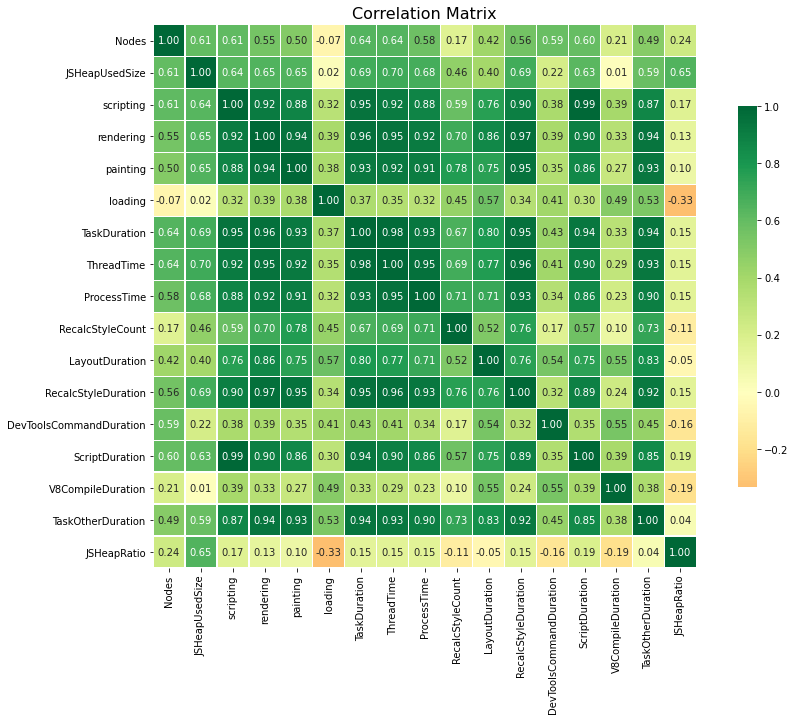

In [54]:
correlation_heatmap(corrdf,'spearman')

In [55]:
# correlation_heatmap(corrdf,'kendall')

In [56]:
# # cmap = ListedColormap(['r','g'])
# f = plt.figure(figsize=(13, 10))
# plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
# plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
# plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

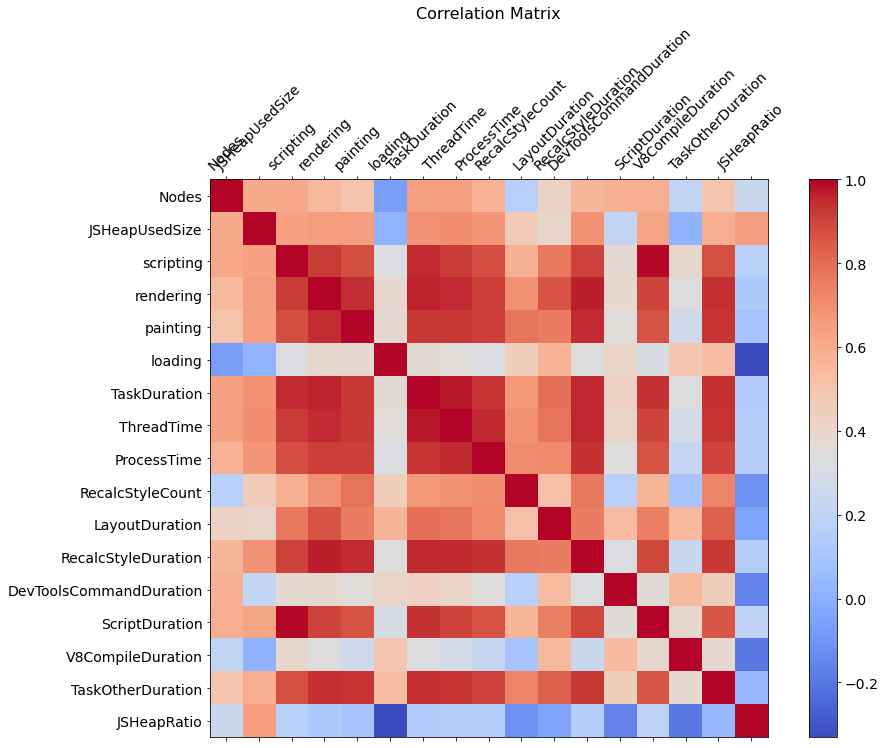

In [57]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Data Prep for Vanilla Regression

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [60]:
model_data = corrdf.drop(columns=['loading','DevToolsCommandDuration','V8CompileDuration'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration','RecalcStyleCount','LayoutDuration','JSHeapRatio']
model_data

,Nodes,JSHeapUsedSize,scripting,rendering,painting,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,ScriptDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058,5.983000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.102257,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199,10.721000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.145061,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772,7.526999,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.109060,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659,7.085000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.097604,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582,8.262000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.113848,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,338.0,5560548.0,97.850000,47.023,5.325000,0.256901,0.296244,0.781250,15.0,0.033536,0.007777,0.088454,0.109034,0.756720
0,338.0,5876352.0,110.877999,56.676,9.951999,0.288660,0.338296,0.921875,40.0,0.032822,0.013600,0.097353,0.128425,0.799697
0,338.0,5571636.0,105.055001,57.921,9.035000,0.283464,0.323344,0.859375,32.0,0.037535,0.012329,0.095612,0.120235,0.758229
0,338.0,5573408.0,109.488000,52.567,7.227000,0.283823,0.319941,0.859375,23.0,0.034223,0.009331,0.100385,0.118562,0.758470


## Flexible Regression model

In [61]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(activation='relu', learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [62]:
# Train-Test-Split = 0.25
split_ratio = int(model_data.shape[0] * 0.25)

train_dataset = model_data.iloc[:split_ratio]
test_dataset = model_data.iloc[split_ratio:]

In [63]:
len(train_dataset),len(test_dataset)

(394, 1185)

In [64]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,394.0,1.540198e+03,1.646231e+03,3.300000e+02,3.390000e+02,3.440000e+02,3.299000e+03,1.047000e+04
JSHeapUsedSize,394.0,2.795178e+07,2.981131e+07,5.178828e+06,5.413725e+06,5.658302e+06,5.359216e+07,1.236279e+08
scripting,394.0,4.025549e+02,3.799708e+02,9.161500e+01,1.046738e+02,1.249575e+02,8.087887e+02,1.492193e+03
rendering,394.0,7.828049e+01,3.925170e+01,3.721400e+01,4.715375e+01,5.822150e+01,1.158938e+02,2.461760e+02
painting,394.0,1.075751e+01,5.752239e+00,1.013000e+00,5.617250e+00,9.669500e+00,1.524600e+01,4.301900e+01
TaskDuration,394.0,6.241645e-01,4.558786e-01,2.110390e-01,2.647427e-01,3.075565e-01,1.133342e+00,1.918330e+00
ThreadTime,394.0,6.165173e-01,3.950279e-01,2.423930e-01,3.014260e-01,3.549325e-01,1.058836e+00,1.731875e+00
ProcessTime,394.0,1.953878e+00,1.320996e+00,5.156250e-01,7.812500e-01,1.125000e+00,3.328125e+00,6.937500e+00
RecalcStyleCount,394.0,2.538071e+01,1.460688e+01,6.000000e+00,1.500000e+01,2.450000e+01,2.900000e+01,1.210000e+02
LayoutDuration,394.0,3.649663e-02,6.617921e-03,2.916400e-02,3.213525e-02,3.496600e-02,3.874750e-02,8.091300e-02


In [65]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [66]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [67]:
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [68]:
len(normed_train_data),len(normed_test_data)

(394, 1185)

In [69]:
normed_train_data.head()

,JSHeapRatio,JSHeapUsedSize,LayoutDuration,ProcessTime,RecalcStyleCount,RecalcStyleDuration,ScriptDuration,TaskDuration,TaskOtherDuration,ThreadTime,painting,rendering,scripting
0,-0.108493,-0.756063,6.711529,-0.804888,-1.326820,-0.847703,-0.768936,1.572518,12.782798,-0.608874,-0.830026,0.376481,-0.762024
0,-0.041882,-0.754787,3.885112,1.406985,-0.779133,-0.656838,-0.649774,-0.470468,0.279444,-0.411121,-0.006347,0.125307,-0.628464
0,0.005630,-0.753876,0.736390,-0.958654,-0.162986,-0.660049,-0.749997,-0.704625,-0.301674,-0.697936,-0.561609,-0.420580,-0.745939
0,-0.055703,-0.755052,-0.035001,-0.674778,-0.436829,-0.781792,-0.781889,-0.777583,-0.441198,-0.690468,-0.638448,-0.703702,-0.779612
0,-0.054561,-0.755030,0.388244,-0.662949,-0.710673,-0.749393,-0.736667,-0.699325,-0.289646,-0.669761,-0.433832,-0.501851,-0.724682


## Accuracy with old data

In [72]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = flex_reg_model(activation='relu',learning_rate=0.01)
history = model.fit(
  normed_train_data, train_labels,
  epochs=1000, validation_split = 0.2,batch_size=64,
  callbacks=[early_stop],
  verbose=0
)

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

test_predictions = model.predict(normed_test_data).flatten()

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

accuracy = explained_variance_score(test_labels,test_predictions)
print(f' Explained Variance : {accuracy} (1 is best, lower scores are worse )')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

R^2 coefficient of determination: 0.9614270221825909 (1 is best, can be negative if output is reverse of input)
 Explained Variance : 0.9627149603031803 (1 is best, lower scores are worse )
Root Mean Squared Error: 451.4188211065466
Mean Absolute Error: 158.80722790166797


# Together with new Files

In [73]:
new_trace_files = glob.glob('./tracelyzer/**/*.json')
len(new_trace_files), [int(trace_file.split('\\')[2].split('-')[0]) for trace_file in new_trace_files]

(658,
 [1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  1000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10000,
  10470,
  11000,
  11000,
  11000,
  11000,
  11000,
  11000,
  11000,
  11000,
  11600,
  11600,
  11600,
  11600,
  11600,
  11600,
  1180,
  1180,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12000,
  12849,
  12849,
  13000,
  13000,
  13000,
  13000,
  13000,
  13000,
  13000,
  13000,
  13000,
  1347,
  1347,
  1347,
  1347,
  1347,
  1347,
  13679,
  13679,
  13679,
  13896,
  13896,
  13896,
  13908,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14000,
  14075,
  14075,
  14075,
  15000,
  15000,
  15000,
  15000,
  15000,
  15000,
  15000,
  15000,
  15000,
  16000,
  16000,
  16000,
  16000,
  16000,
  16000,
  16000,
  16000,
  16000,
  16000,
  16000,
  1600

In [74]:
shape_data = [int(trace_file.split('\\')[1].split('-')[0]) for trace_file in trace_files] +  [int(trace_file.split('\\')[2].split('-')[0]) for trace_file in new_trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((212, 1),
        value
 1000      32
 1180      18
 1347      44
 1526       1
 2000      32
 ...      ...
 90000      3
 92000      3
 94000      3
 96000      3
 98000      6
 
 [212 rows x 1 columns])

In [75]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files + new_trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [76]:
mydf

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Run Microtasks,Paint,...,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,Animation Frame Fired,Image Decode,XHR Load,Major GC,fps,Fire Idle Callback
0,113.008000,93.058000,24.101,5.983000,95.256999,81.076,22.023000,9.582,9.031,5.326000,...,1608585424648,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
0,163.756999,83.199000,24.709,10.721000,133.487000,62.112,22.531000,14.405,14.574,5.044000,...,1608585428697,0,0,0,2.380999,0.058,NaN,NaN,NaN,NaN
0,119.120000,61.772000,18.341,7.526999,101.358999,41.275,16.671001,14.122,8.241,3.652000,...,1608585436322,0,0,0,2.966000,0.066,NaN,NaN,NaN,NaN
0,106.325000,50.659000,16.904,7.085000,89.634000,36.099,15.776000,9.974,6.505,4.070000,...,1608585441768,0,0,0,2.802000,0.090,NaN,NaN,NaN,NaN
0,127.197000,58.582000,19.088,8.262000,108.212000,38.772,17.612000,13.989,7.831,4.247000,...,1608585448156,0,0,0,2.725000,0.119,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,6838.876000,3365.396000,19.371,13757.103000,6326.127000,587.138,18.496000,2422.322,11.799,1245.955000,...,1611610782236,0,0,0,1.384000,NaN,89.405000,67.980,NaN,NaN
0,6938.676000,3362.770000,18.903,14335.976000,6505.424001,584.081,18.120000,2425.685,8.094,1271.181001,...,1611610699883,0,0,0,1.692000,NaN,14.151000,73.266,NaN,NaN
0,7046.927001,3432.588001,19.808,15147.170000,6609.271999,612.281,18.853000,2440.376,8.146,1325.099000,...,1611610821015,0,0,0,1.503000,NaN,16.222001,70.706,NaN,NaN
0,7188.470000,3693.317000,22.802,19261.301000,6753.041000,638.599,20.745000,2653.083,8.106,1493.092000,...,1611610737698,0,0,0,1.092000,NaN,15.378000,62.897,NaN,NaN


In [81]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [82]:
mydf.to_csv('metric-newdataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [83]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

'26Jan2021-1115AM'

## Correlation of Columns with new data

In [84]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Layout
☐Parse HTML
☐Recalculate Style
☐Run Microtasks
☐Paint
☐Compile Script
☐Minor GC
☐Update Layer Tree
☐Parse Stylesheet
☐Composite Layers
☐Evaluate Script
☐Hit Test
☐XHR Ready State Change
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart
☐connectEnd
☐connectStart
☐domComplete
☐domContentLoadedEventEnd
☐domContentLoadedEventStart


In [85]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,330.0,5412548.0,7348224.0,113.008000,93.058000,5.983000,24.101,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688
0,330.0,5450604.0,7348224.0,163.756999,83.199000,10.721000,24.709,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864
0,330.0,5477748.0,7348224.0,119.120000,61.772000,7.526999,18.341,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836
0,330.0,5442708.0,7348224.0,106.325000,50.659000,7.085000,16.904,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025
0,330.0,5443360.0,7348224.0,127.197000,58.582000,8.262000,19.088,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62247.0,106697560.0,121307136.0,6838.876000,3365.396000,13757.103000,19.371,7.731603,6.419089,33.109375,44.0,0.286815,1.385415,0.106246,4.078278,0.004059,1.870790
0,98445.0,231284620.0,253685760.0,6938.676000,3362.770000,14335.976000,18.903,25.930769,11.915310,124.750000,65.0,0.584558,2.459063,0.082514,6.888126,0.003270,15.913238
0,65253.0,118560240.0,133632000.0,7046.927001,3432.588001,15147.170000,19.808,8.844113,6.891497,36.281250,50.0,0.324791,1.443555,0.080017,4.413472,0.003290,2.578988
0,80337.0,168599896.0,186408960.0,7188.470000,3693.317000,19261.301000,22.802,15.941239,9.389275,74.203125,53.0,0.443372,2.037956,0.081852,5.602778,0.003592,7.771689


In [86]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058000,5.983000,24.101,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.007277,0.102257,0.004325,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199000,10.721000,24.709,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.011935,0.145061,0.007035,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772000,7.526999,18.341,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.010600,0.109060,0.003591,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659000,7.085000,16.904,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.008454,0.097604,0.003678,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582000,8.262000,19.088,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.011396,0.113848,0.004605,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62247.0,106697560.0,6838.876000,3365.396000,13757.103000,19.371,7.731603,6.419089,33.109375,44.0,0.286815,1.385415,0.106246,4.078278,0.004059,1.870790,0.879565
0,98445.0,231284620.0,6938.676000,3362.770000,14335.976000,18.903,25.930769,11.915310,124.750000,65.0,0.584558,2.459063,0.082514,6.888126,0.003270,15.913238,0.911697
0,65253.0,118560240.0,7046.927001,3432.588001,15147.170000,19.808,8.844113,6.891497,36.281250,50.0,0.324791,1.443555,0.080017,4.413472,0.003290,2.578988,0.887214
0,80337.0,168599896.0,7188.470000,3693.317000,19261.301000,22.802,15.941239,9.389275,74.203125,53.0,0.443372,2.037956,0.081852,5.602778,0.003592,7.771689,0.904462


In [87]:
# corrdf.corr()
corrdf.corr('spearman')

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.813051,0.844471,0.824925,0.800630,-0.007990,0.854765,0.857313,0.822689,0.419880,0.712201,0.834775,0.330952,0.839503,0.089555,0.723201,0.383624
JSHeapUsedSize,0.813051,1.000000,0.846249,0.813041,0.808743,0.001542,0.854792,0.863972,0.841881,0.579971,0.630997,0.840353,0.150191,0.845624,-0.031022,0.755585,0.672074
scripting,0.844471,0.846249,1.000000,0.957516,0.938029,0.213918,0.977788,0.966012,0.943123,0.656845,0.847059,0.953652,0.248429,0.996313,0.191555,0.904118,0.422527
rendering,0.824925,0.813041,0.957516,1.000000,0.975337,0.274629,0.975611,0.972565,0.953650,0.700918,0.915554,0.984113,0.246647,0.951037,0.176817,0.926683,0.344315
painting,0.800630,0.808743,0.938029,0.975337,1.000000,0.269521,0.960509,0.958776,0.952160,0.756526,0.864406,0.975249,0.222491,0.931991,0.139917,0.927419,0.334255
loading,-0.007990,0.001542,0.213918,0.274629,0.269521,1.000000,0.260969,0.237202,0.221777,0.414208,0.452485,0.227210,0.432834,0.203624,0.409367,0.428159,-0.134160
TaskDuration,0.854765,0.854792,0.977788,0.975611,0.960509,0.260969,1.000000,0.988493,0.964285,0.701695,0.877791,0.972926,0.296430,0.973166,0.166658,0.946070,0.402260
ThreadTime,0.857313,0.863972,0.966012,0.972565,0.958776,0.237202,0.988493,1.000000,0.976989,0.707138,0.861118,0.975534,0.272725,0.960466,0.139469,0.932926,0.403485
ProcessTime,0.822689,0.841881,0.943123,0.953650,0.952160,0.221777,0.964285,0.976989,1.000000,0.719387,0.829939,0.962269,0.224090,0.939359,0.107960,0.917714,0.397259
RecalcStyleCount,0.419880,0.579971,0.656845,0.700918,0.756526,0.414208,0.701695,0.707138,0.719387,1.000000,0.612434,0.729926,0.225191,0.650724,0.060645,0.772136,0.210693


In [88]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
# correlation_heatmap(corrdf) 

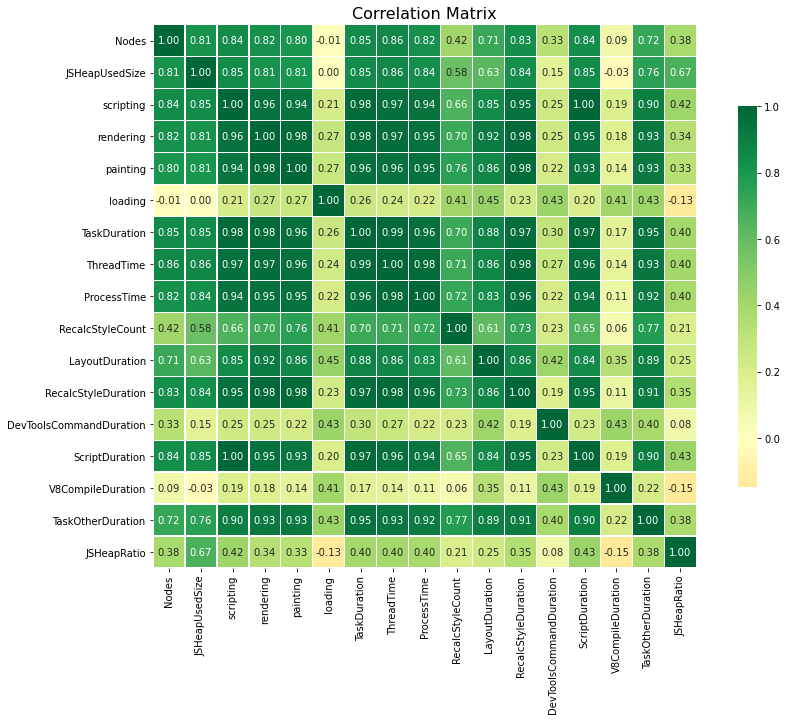

In [89]:
correlation_heatmap(corrdf,'spearman')

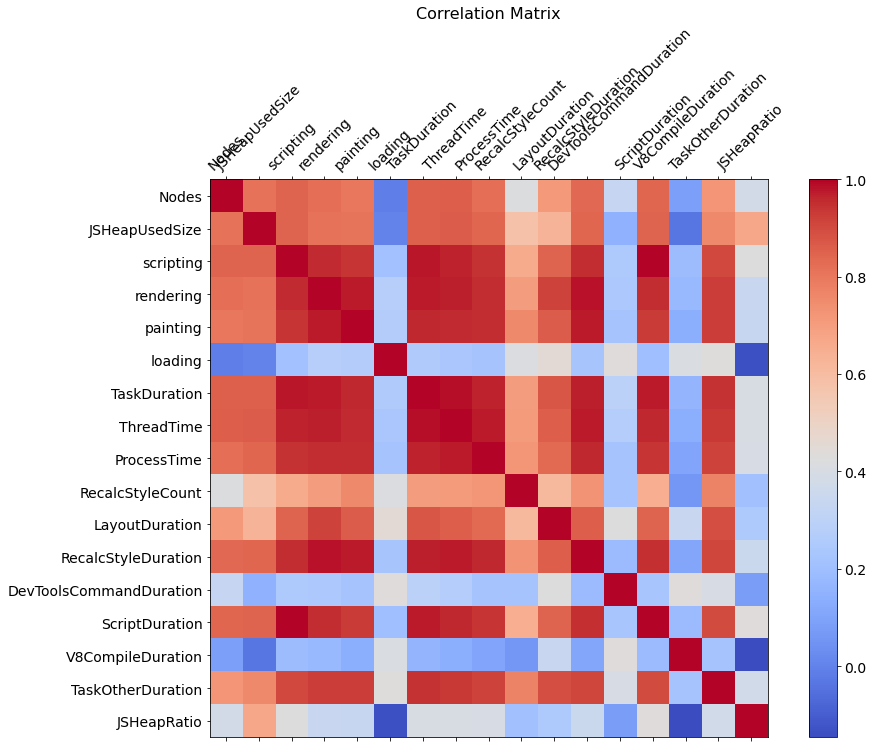

In [90]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Data Prep for Vanilla Regression

In [91]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [93]:
model_data = corrdf.drop(columns=['loading','DevToolsCommandDuration','V8CompileDuration'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration','RecalcStyleCount','LayoutDuration','JSHeapRatio',]
model_data

,Nodes,JSHeapUsedSize,scripting,rendering,painting,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,ScriptDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5412548.0,113.008000,93.058000,5.983000,1.341042,0.375995,0.890625,6.0,0.080913,0.006582,0.102257,1.139688,0.736579
0,330.0,5450604.0,163.756999,83.199000,10.721000,0.409688,0.454113,3.812500,14.0,0.062208,0.012585,0.145061,0.170864,0.741758
0,330.0,5477748.0,119.120000,61.772000,7.526999,0.302941,0.340813,0.687500,23.0,0.041370,0.012484,0.109060,0.125836,0.745452
0,330.0,5442708.0,106.325000,50.659000,7.085000,0.269681,0.343763,1.062500,19.0,0.036265,0.008655,0.097604,0.115025,0.740683
0,330.0,5443360.0,127.197000,58.582000,8.262000,0.305357,0.351943,1.078125,15.0,0.039066,0.009674,0.113848,0.126768,0.740772
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62247.0,106697560.0,6838.876000,3365.396000,13757.103000,7.731603,6.419089,33.109375,44.0,0.286815,1.385415,4.078278,1.870790,0.879565
0,98445.0,231284620.0,6938.676000,3362.770000,14335.976000,25.930769,11.915310,124.750000,65.0,0.584558,2.459063,6.888126,15.913238,0.911697
0,65253.0,118560240.0,7046.927001,3432.588001,15147.170000,8.844113,6.891497,36.281250,50.0,0.324791,1.443555,4.413472,2.578988,0.887214
0,80337.0,168599896.0,7188.470000,3693.317000,19261.301000,15.941239,9.389275,74.203125,53.0,0.443372,2.037956,5.602778,7.771689,0.904462


## Flexible Regression model

In [94]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(activation='relu', learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [95]:
# Train-Test-Split = 0.25
split_ratio = int(model_data.shape[0] * 0.25)

train_dataset = model_data.iloc[:split_ratio]
test_dataset = model_data.iloc[split_ratio:]

In [96]:
len(train_dataset),len(test_dataset)

(559, 1678)

In [97]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,559.0,1.586791e+03,1.750542e+03,3.300000e+02,3.420000e+02,3.480000e+02,3.327000e+03,1.047000e+04
JSHeapUsedSize,559.0,2.819416e+07,3.071053e+07,5.178828e+06,5.432946e+06,5.679496e+06,5.489139e+07,1.236279e+08
scripting,559.0,4.076004e+02,3.971052e+02,8.904100e+01,1.030410e+02,1.209970e+02,8.295040e+02,1.798433e+03
rendering,559.0,7.859318e+01,4.222702e+01,3.721400e+01,4.499000e+01,5.710500e+01,1.170790e+02,2.617180e+02
painting,559.0,1.058900e+01,6.050438e+00,1.013000e+00,5.193500e+00,9.050000e+00,1.538900e+01,4.301900e+01
TaskDuration,559.0,6.263099e-01,4.722697e-01,2.085860e-01,2.560410e-01,3.056390e-01,1.144046e+00,2.450181e+00
ThreadTime,559.0,6.171194e-01,4.130037e-01,2.418870e-01,2.890920e-01,3.497390e-01,1.075260e+00,2.150709e+00
ProcessTime,559.0,1.922462e+00,1.355963e+00,5.156250e-01,7.656250e-01,1.078125e+00,3.343750e+00,6.937500e+00
RecalcStyleCount,559.0,2.383184e+01,1.358302e+01,6.000000e+00,1.100000e+01,2.400000e+01,2.800000e+01,1.210000e+02
LayoutDuration,559.0,3.647900e-02,6.807444e-03,2.916400e-02,3.190900e-02,3.493900e-02,3.892000e-02,8.091300e-02


In [98]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [99]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [100]:
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [101]:
len(normed_train_data),len(normed_test_data)

(559, 1678)

In [102]:
normed_train_data.head()

,JSHeapRatio,JSHeapUsedSize,LayoutDuration,ProcessTime,RecalcStyleCount,RecalcStyleDuration,ScriptDuration,TaskDuration,TaskOtherDuration,ThreadTime,painting,rendering,scripting
0,-0.138139,-0.741818,6.527267,-0.760963,-1.312804,-0.800478,-0.749321,1.513398,13.052635,-0.583831,-0.761267,0.342549,-0.741850
0,-0.074095,-0.740578,3.779540,1.393871,-0.723833,-0.622097,-0.633583,-0.458683,0.306186,-0.394685,0.021817,0.109073,-0.614052
0,-0.028416,-0.739695,0.718479,-0.910764,-0.061241,-0.625098,-0.730926,-0.684712,-0.286230,-0.669017,-0.506079,-0.398351,-0.726458
0,-0.087383,-0.740836,-0.031436,-0.634208,-0.355727,-0.738878,-0.761902,-0.755138,-0.428467,-0.661874,-0.579131,-0.661524,-0.758679
0,-0.086286,-0.740814,0.380026,-0.622684,-0.650212,-0.708598,-0.717980,-0.679597,-0.273968,-0.642068,-0.384600,-0.473895,-0.706119


## Accuracy with new data

In [109]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = flex_reg_model(activation='relu',learning_rate=0.01)
history = model.fit(
  normed_train_data, train_labels,
  epochs=1000, validation_split = 0.2,batch_size=64,
  callbacks=[early_stop],
  verbose=0
)

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

test_predictions = model.predict(normed_test_data).flatten()

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

accuracy = explained_variance_score(test_labels,test_predictions)
print(f' Explained Variance : {accuracy} (1 is best, lower scores are worse )')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

R^2 coefficient of determination: -0.7554825298816519 (1 is best, can be negative if output is reverse of input)
 Explained Variance : -0.646915957050098 (1 is best, lower scores are worse )
Root Mean Squared Error: 23200.864677953083
Mean Absolute Error: 6727.608401151323


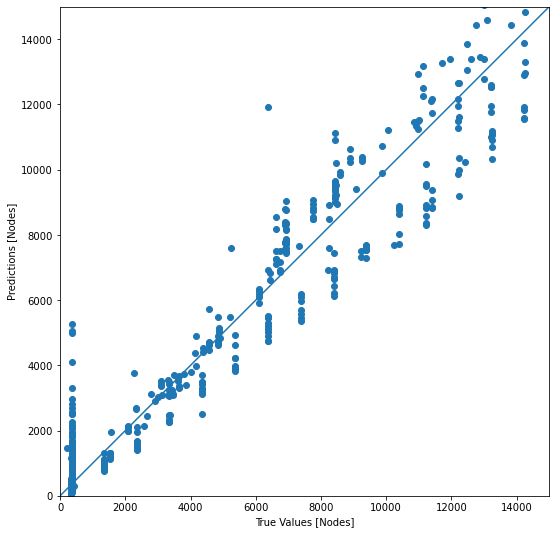

In [110]:
test_predictions = model.predict(normed_test_data).flatten()

a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 15000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

In [386]:
sample_test = np.array(normed_train_data.iloc[50]).reshape((1,15))
sample_test

array([[-0.57111212,  0.11323582, -0.7498037 , -0.99106631, -1.00824361,
        -0.98449153, -0.87315805, -0.79405838, -0.8727151 , -0.91331374,
        -0.90299511,  0.28743517, -1.1287649 , -1.00082585, -0.79424431]])

In [387]:
sample2 = np.array(normed_test_data.iloc[209]).reshape((1,15))
sample2

array([[ 3.71585759, -2.0843609 , -0.73970368,  1.75550089, -0.3086097 ,
        -0.02618238, -0.46764603, -0.58090743, -0.26318556,  0.48903913,
        -0.44792515,  2.21035182, -0.29370907, -0.00940473, -0.55827633]])

In [388]:
normed_test_data.shape, sample_test.shape, sample2.shape

((1179, 15), (1, 15), (1, 15))

In [389]:
model.predict(sample_test), train_labels.iloc[50]

(array([[346.58047]], dtype=float32), 340.0)

In [390]:
model.predict(sample2), test_labels.iloc[209]

(array([[339.26627]], dtype=float32), 376.0)

In [411]:
len(normed_test_data)

1179

In [437]:
from random import randint
l = []
for i in range(30):
    x = randint(0,1024)
    if x not in l:
        l.append(x)

resultdf = {}

for i in l:
    sample_test = np.array(normed_test_data.iloc[i]).reshape((1,test_dataset.shape[1]))
    resultdf[test_labels.iloc[i]] = model.predict(sample_test).flatten()
    
resultdf

{373.0: array([454.9573], dtype=float32),
 366.0: array([347.959], dtype=float32),
 333.0: array([376.78055], dtype=float32),
 375.0: array([402.68597], dtype=float32),
 3655.0: array([3474.6243], dtype=float32),
 378.0: array([409.11093], dtype=float32),
 367.0: array([380.92072], dtype=float32),
 374.0: array([392.70853], dtype=float32),
 352.0: array([357.19077], dtype=float32),
 4859.0: array([4800.014], dtype=float32),
 354.0: array([366.98544], dtype=float32),
 348.0: array([374.42197], dtype=float32),
 353.0: array([366.718], dtype=float32),
 350.0: array([354.68027], dtype=float32),
 346.0: array([349.6535], dtype=float32),
 6928.0: array([7394.32], dtype=float32),
 372.0: array([397.34824], dtype=float32),
 376.0: array([347.54037], dtype=float32),
 369.0: array([390.21335], dtype=float32),
 356.0: array([367.5914], dtype=float32),
 359.0: array([367.22464], dtype=float32),
 362.0: array([402.47534], dtype=float32)}

In [438]:
resultdf = pd.DataFrame.from_dict(resultdf,orient='index',columns=['Predicted Nodes'])
resultdf

,Predicted Nodes
373.0,454.957306
366.0,347.959015
333.0,376.780548
375.0,402.685974
3655.0,3474.624268
378.0,409.110931
367.0,380.920715
374.0,392.708527
352.0,357.190765
4859.0,4800.014160


# Only New Data

In [111]:
trace_files = glob.glob('./tracelyzer/**/*.json')
trace_files

['./tracelyzer\\25jan\\1000-state-metrics_run_0_1611601701535.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_0_1611601975211.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_0_1611601996309.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_0_1611603034990.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_1_1611601703479.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_1_1611601977149.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_1_1611601999652.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_1_1611603036797.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_2_1611601705389.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_2_1611601979087.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_2_1611602001297.json',
 './tracelyzer\\25jan\\1000-state-metrics_run_2_1611603038683.json',
 './tracelyzer\\25jan\\10000-state-metrics_run_0_1611601780281.json',
 './tracelyzer\\25jan\\10000-state-metrics_run_0_1611602073896.json',
 './tracelyzer\\25jan\\10000-sta

In [112]:
shape_data = [int(trace_file.split('\\')[2].split('-')[0]) for trace_file in trace_files]
shape_data
from collections import Counter
sCounter = Counter(shape_data)
shapesdf = pd.DataFrame().from_dict({'value':dict(sCounter)})
shapesdf.shape, shapesdf

((133, 1),
        value
 1000      12
 1180       2
 1347       6
 2000      14
 2873       3
 ...      ...
 90000      3
 92000      3
 94000      3
 96000      3
 98000      6
 
 [133 rows x 1 columns])

In [113]:
mydf = pd.DataFrame()
#load json object
for trace_file in trace_files:
    with open(trace_file) as f:
        try:
            d = json.load(f)
        except:
            print(f'file: {file} cannot be read')
        
        #lets put the data into a pandas df
        #clicking on raw_nyc_phil.json under "Input Files"
        #tells us parent node is 'programs'
        nycphil = json_normalize(d['profiling']['categories'])
#         print(nycphil.head(3))
        
        nycphil1 = json_normalize(d['profiling']['events'])
#         print(nycphil1.head(3))
        
        nycphil2 = json_normalize(d['rendering'])
#         print(nycphil2.head(3))
        
        nycphil3 = json_normalize(data=d['metrics'], meta=['name','value'])#json_normalize(d['metrics'])
        nycphil3 = nycphil3.set_index('name')
        # nycphil3 = nycphil3.rename(columns={"value": "0"})
        nycphil3 = nycphil3.T
#         print(nycphil3.head(3))
        
        nycphil4 = d['performanceTiming']
        nycphil4 = pd.DataFrame({'value':json.loads(nycphil4)})
        nycphil4 = nycphil4.T
#         nycphil4.head(3)
#         perfkeys = [key for key in d.keys() if key not in ['profiling','rendering','metrics']]
#         nycphil4 = {
#                 key:d[key] for key in perfkeys
#                    }
#         nycphil4 = pd.DataFrame(nycphil4,index={'value'})
#         nycphil4.head()

#         print(nycphil.shape, nycphil1.shape, nycphil2.shape, nycphil3.shape)
        
        for col in nycphil1:
            nycphil[col] = nycphil1[col]
            
        for col in nycphil2:
            nycphil[col] = nycphil2[col]
        
        for col in nycphil3:
        #     print(nycphil3[col])
            nycphil[col] = nycphil3.iloc[0][col]
        
        for col in nycphil4:
        #     print(nycphil4[col])
            nycphil[col] = nycphil4.iloc[0][col]
        
        
#         print(nycphil.shape)
    mydf = nycphil if not mydf.count().any() else mydf.append(nycphil)

In [114]:
mydf

,scripting,rendering,loading,painting,JS Frame,Layout,Parse HTML,Recalculate Style,Evaluate Script,Run Microtasks,...,redirectEnd,redirectStart,requestStart,responseEnd,responseStart,secureConnectionStart,unloadEventEnd,unloadEventStart,XHR Load,Major GC
0,97.739000,45.234000,13.871,5.314,78.945000,34.250,12.861,8.057,5.828,5.817,...,0,0,1611601696513,1611601696907,1611601696907,0,0,0,NaN,NaN
0,189.392000,61.903000,16.588,9.024,167.507000,33.949,15.340,24.347,5.313,4.615,...,0,0,1611601973411,1611601973413,1611601973412,0,0,0,0.350000,NaN
0,107.603000,41.668000,17.542,4.709,89.825000,31.216,16.061,7.733,5.319,4.199,...,0,0,1611601992534,1611601992535,1611601992535,0,0,0,1.080000,NaN
0,94.926000,42.532000,15.364,5.742,74.755000,32.596,14.545,7.180,6.151,6.763,...,0,0,1611603033571,1611603033572,1611603033572,0,0,0,NaN,NaN
0,202.955000,65.467000,17.596,8.460,177.972000,34.493,16.349,26.420,6.094,4.971,...,0,0,1611601701944,1611601701953,1611601701952,0,0,0,0.341000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,6838.876000,3365.396000,19.371,13757.103,6326.127000,587.138,18.496,2422.322,5.912,11.799,...,0,0,1611610782235,1611610782237,1611610782236,0,0,0,89.405000,67.980
0,6938.676000,3362.770000,18.903,14335.976,6505.424001,584.081,18.120,2425.685,5.960,8.094,...,0,0,1611610699883,1611610699884,1611610699883,0,0,0,14.151000,73.266
0,7046.927001,3432.588001,19.808,15147.170,6609.271999,612.281,18.853,2440.376,5.702,8.146,...,0,0,1611610821015,1611610821016,1611610821015,0,0,0,16.222001,70.706
0,7188.470000,3693.317000,22.802,19261.301,6753.041000,638.599,20.745,2653.083,5.532,8.106,...,0,0,1611610737697,1611610737699,1611610737698,0,0,0,15.378000,62.897


In [115]:
# is_NaN = mydf.isnull()
# row_has_NaN = is_NaN.any(axis=1)
# nans = mydf.loc[row_has_NaN == True]
# nans.to_csv('nans.csv')
mydf = mydf.fillna('0')

In [118]:
mydf.to_csv('metric-onlynewdataframe-'+ datetime.datetime.now().strftime("%d%b%Y-%I%M%p") + '.csv')

In [119]:
import datetime
datetime.datetime.now().strftime("%d%b%Y-%I%M%p")

'26Jan2021-1123AM'

## Correlation of Columns

In [120]:
done = u'\u2713'
todo = u'\u2610'
done_list = [
    'Nodes','JSHeapUsedSize','JSHeapTotalSize'
     ,'scripting','rendering','painting','loading',
     'TaskDuration','ThreadTime','ProcessTime'
    ,'RecalcStyleCount'
    ,'LayoutDuration'
    ,'RecalcStyleDuration'
    ,'DevToolsCommandDuration'
    ,'ScriptDuration'
    ,'V8CompileDuration'
    ,'TaskOtherDuration'
            ]
for func in done_list:
    funcname = func.split("(")[0]
    print(done + funcname)
for func in [col for col in list(mydf.columns) if col not in done_list]:
    funcname = func.split("(")[0]
    print(todo + funcname)

✓Nodes
✓JSHeapUsedSize
✓JSHeapTotalSize
✓scripting
✓rendering
✓painting
✓loading
✓TaskDuration
✓ThreadTime
✓ProcessTime
✓RecalcStyleCount
✓LayoutDuration
✓RecalcStyleDuration
✓DevToolsCommandDuration
✓ScriptDuration
✓V8CompileDuration
✓TaskOtherDuration
☐JS Frame
☐Layout
☐Parse HTML
☐Recalculate Style
☐Evaluate Script
☐Run Microtasks
☐Compile Script
☐Paint
☐Update Layer Tree
☐Minor GC
☐Composite Layers
☐Animation Frame Fired
☐Parse Stylesheet
☐Hit Test
☐XHR Ready State Change
☐firstPaint
☐forcedReflowEvents
☐fps.mean
☐fps.variance
☐fps.sd
☐fps.lo
☐fps.hi
☐Timestamp
☐AudioHandlers
☐Documents
☐Frames
☐JSEventListeners
☐LayoutObjects
☐MediaKeySessions
☐MediaKeys
☐Resources
☐ContextLifecycleStateObservers
☐V8PerContextDatas
☐WorkerGlobalScopes
☐UACSSResources
☐RTCPeerConnections
☐ResourceFetchers
☐AdSubframes
☐DetachedScriptStates
☐ArrayBufferContents
☐LayoutCount
☐FirstMeaningfulPaint
☐DomContentLoaded
☐NavigationStart
☐connectEnd
☐connectStart
☐domComplete
☐domContentLoadedEventEnd
☐domC

In [121]:
corrdf = mydf[done_list] #'Major GC','Minor GC'
corrdf

,Nodes,JSHeapUsedSize,JSHeapTotalSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration
0,330.0,5214324.0,7086080.0,97.739000,45.234000,5.314,13.871,0.217424,0.278963,2.859375,16.0,0.034067,0.007395,0.007410,0.090216,0.003383,0.074953
0,1338.0,8418036.0,15998976.0,189.392000,61.903000,9.024,16.588,0.329976,0.365524,1.125000,14.0,0.033838,0.023505,0.006954,0.183094,0.003002,0.079583
0,330.0,5215916.0,7086080.0,107.603000,41.668000,4.709,17.542,0.227624,0.332855,2.953125,15.0,0.031056,0.007066,0.006518,0.100757,0.003352,0.078875
0,330.0,5210460.0,7086080.0,94.926000,42.532000,5.742,15.364,0.214513,0.263034,0.812500,14.0,0.032539,0.006536,0.006677,0.086243,0.003525,0.078993
0,330.0,5206024.0,7086080.0,202.955000,65.467000,8.460,17.596,0.231008,0.262422,0.671875,16.0,0.031870,0.008207,0.007297,0.095894,0.004081,0.083659
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62247.0,106697560.0,121307136.0,6838.876000,3365.396000,13757.103,19.371,7.731603,6.419089,33.109375,44.0,0.286815,1.385415,0.106246,4.078278,0.004059,1.870790
0,98445.0,231284620.0,253685760.0,6938.676000,3362.770000,14335.976,18.903,25.930769,11.915310,124.750000,65.0,0.584558,2.459063,0.082514,6.888126,0.003270,15.913238
0,65253.0,118560240.0,133632000.0,7046.927001,3432.588001,15147.170,19.808,8.844113,6.891497,36.281250,50.0,0.324791,1.443555,0.080017,4.413472,0.003290,2.578988
0,80337.0,168599896.0,186408960.0,7188.470000,3693.317000,19261.301,22.802,15.941239,9.389275,74.203125,53.0,0.443372,2.037956,0.081852,5.602778,0.003592,7.771689


In [122]:
corrdf['JSHeapRatio'] = corrdf['JSHeapUsedSize']/corrdf['JSHeapTotalSize']
corrdf = corrdf.drop(columns='JSHeapTotalSize')
corrdf

C:\Users\Sanke\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5214324.0,97.739000,45.234000,5.314,13.871,0.217424,0.278963,2.859375,16.0,0.034067,0.007395,0.007410,0.090216,0.003383,0.074953,0.735855
0,1338.0,8418036.0,189.392000,61.903000,9.024,16.588,0.329976,0.365524,1.125000,14.0,0.033838,0.023505,0.006954,0.183094,0.003002,0.079583,0.526161
0,330.0,5215916.0,107.603000,41.668000,4.709,17.542,0.227624,0.332855,2.953125,15.0,0.031056,0.007066,0.006518,0.100757,0.003352,0.078875,0.736079
0,330.0,5210460.0,94.926000,42.532000,5.742,15.364,0.214513,0.263034,0.812500,14.0,0.032539,0.006536,0.006677,0.086243,0.003525,0.078993,0.735309
0,330.0,5206024.0,202.955000,65.467000,8.460,17.596,0.231008,0.262422,0.671875,16.0,0.031870,0.008207,0.007297,0.095894,0.004081,0.083659,0.734683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62247.0,106697560.0,6838.876000,3365.396000,13757.103,19.371,7.731603,6.419089,33.109375,44.0,0.286815,1.385415,0.106246,4.078278,0.004059,1.870790,0.879565
0,98445.0,231284620.0,6938.676000,3362.770000,14335.976,18.903,25.930769,11.915310,124.750000,65.0,0.584558,2.459063,0.082514,6.888126,0.003270,15.913238,0.911697
0,65253.0,118560240.0,7046.927001,3432.588001,15147.170,19.808,8.844113,6.891497,36.281250,50.0,0.324791,1.443555,0.080017,4.413472,0.003290,2.578988,0.887214
0,80337.0,168599896.0,7188.470000,3693.317000,19261.301,22.802,15.941239,9.389275,74.203125,53.0,0.443372,2.037956,0.081852,5.602778,0.003592,7.771689,0.904462


In [123]:
# corrdf.corr()
corrdf.corr('spearman')

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,V8CompileDuration,TaskOtherDuration,JSHeapRatio
Nodes,1.000000,0.602954,0.887233,0.984684,0.906631,0.665695,0.917267,0.928158,0.895422,0.778131,0.990105,0.991548,0.896696,0.890095,0.002884,0.876131,0.570109
JSHeapUsedSize,0.602954,1.000000,0.850691,0.602045,0.606807,0.366730,0.804767,0.832791,0.757815,0.873256,0.578883,0.604525,0.708343,0.872021,-0.051448,0.792257,0.973358
scripting,0.887233,0.850691,1.000000,0.911746,0.887308,0.610734,0.963397,0.979171,0.936409,0.915541,0.879796,0.892164,0.912306,0.983485,-0.016483,0.933929,0.824847
rendering,0.984684,0.602045,0.911746,1.000000,0.947575,0.676167,0.930443,0.926564,0.919703,0.782192,0.984528,0.989114,0.898082,0.894092,0.004842,0.899313,0.572169
painting,0.906631,0.606807,0.887308,0.947575,1.000000,0.618030,0.932692,0.888666,0.959036,0.773845,0.917230,0.937158,0.813087,0.872308,-0.027058,0.943079,0.575333
loading,0.665695,0.366730,0.610734,0.676167,0.618030,1.000000,0.599664,0.607903,0.588361,0.509524,0.672949,0.657200,0.616109,0.585067,0.107050,0.573496,0.354786
TaskDuration,0.917267,0.804767,0.963397,0.930443,0.932692,0.599664,1.000000,0.982518,0.983082,0.890256,0.918948,0.937795,0.879209,0.978996,-0.028357,0.984575,0.771019
ThreadTime,0.928158,0.832791,0.979171,0.926564,0.888666,0.607903,0.982518,1.000000,0.949204,0.914437,0.922161,0.932682,0.915356,0.994136,-0.016349,0.948337,0.800792
ProcessTime,0.895422,0.757815,0.936409,0.919703,0.959036,0.588361,0.983082,0.949204,1.000000,0.865799,0.899307,0.924084,0.842515,0.946181,-0.046730,0.989222,0.728797
RecalcStyleCount,0.778131,0.873256,0.915541,0.782192,0.773845,0.509524,0.890256,0.914437,0.865799,1.000000,0.766540,0.782315,0.820154,0.927515,-0.041154,0.875972,0.847520


In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

def correlation_heatmap(train, method='pearson'):
    correlations = train.corr(method)

    fig, ax = plt.subplots(figsize=(15,10))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70},cmap='RdYlGn')
    plt.title('Correlation Matrix', fontsize=16);
    plt.show();
    
# correlation_heatmap(corrdf) 

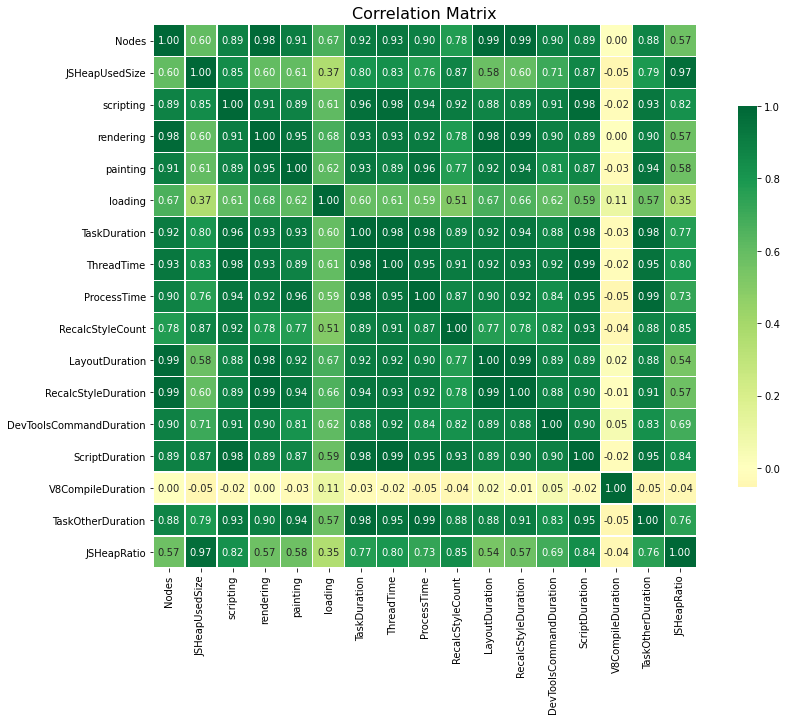

In [125]:
correlation_heatmap(corrdf,'spearman')

In [126]:
# correlation_heatmap(corrdf,'kendall')

In [127]:
# # cmap = ListedColormap(['r','g'])
# f = plt.figure(figsize=(13, 10))
# plt.matshow(corrdf.corr(), fignum=f.number, cmap='RdYlGn') #cmap=cmap
# plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
# plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
# cb = plt.colorbar()
# cb.ax.tick_params(labelsize=14)
# plt.title('Correlation Matrix', fontsize=16);

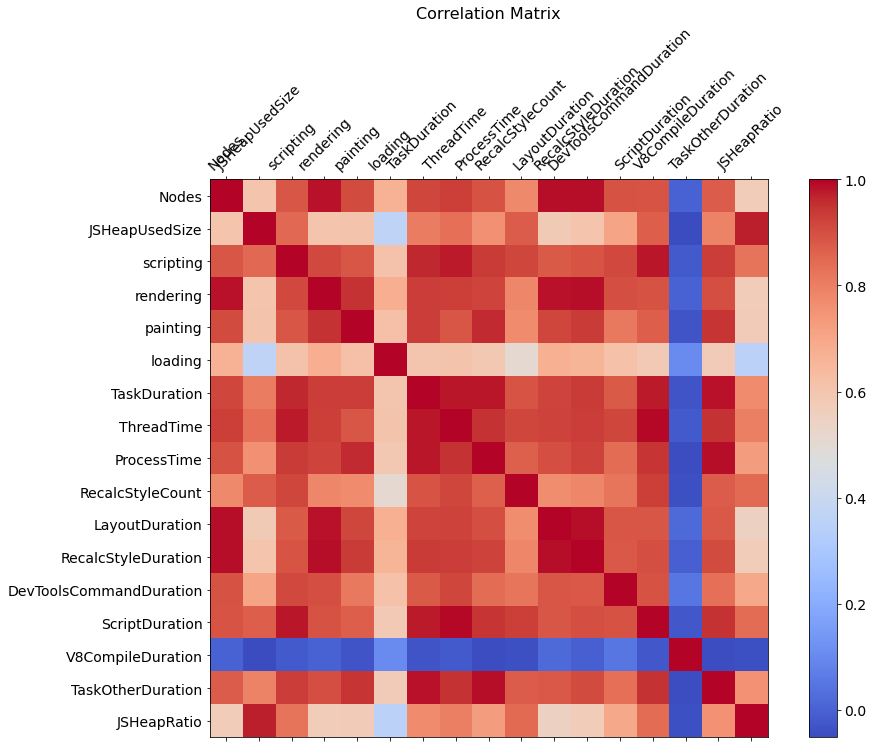

In [128]:
f = plt.figure(figsize=(15, 10))
plt.matshow(corrdf.corr('spearman'), fignum=f.number, cmap='coolwarm') #cmap=cmap
plt.xticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14, rotation=45)
plt.yticks(range(corrdf.shape[1]), corrdf.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

## Data Prep for Vanilla Regression

In [58]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [129]:
model_data = corrdf.drop(columns=['V8CompileDuration'])#['loading','Documents','Resources','DevToolsCommandDuration','V8CompileDuration','RecalcStyleCount','LayoutDuration','JSHeapRatio']
model_data

,Nodes,JSHeapUsedSize,scripting,rendering,painting,loading,TaskDuration,ThreadTime,ProcessTime,RecalcStyleCount,LayoutDuration,RecalcStyleDuration,DevToolsCommandDuration,ScriptDuration,TaskOtherDuration,JSHeapRatio
0,330.0,5214324.0,97.739000,45.234000,5.314,13.871,0.217424,0.278963,2.859375,16.0,0.034067,0.007395,0.007410,0.090216,0.074953,0.735855
0,1338.0,8418036.0,189.392000,61.903000,9.024,16.588,0.329976,0.365524,1.125000,14.0,0.033838,0.023505,0.006954,0.183094,0.079583,0.526161
0,330.0,5215916.0,107.603000,41.668000,4.709,17.542,0.227624,0.332855,2.953125,15.0,0.031056,0.007066,0.006518,0.100757,0.078875,0.736079
0,330.0,5210460.0,94.926000,42.532000,5.742,15.364,0.214513,0.263034,0.812500,14.0,0.032539,0.006536,0.006677,0.086243,0.078993,0.735309
0,330.0,5206024.0,202.955000,65.467000,8.460,17.596,0.231008,0.262422,0.671875,16.0,0.031870,0.008207,0.007297,0.095894,0.083659,0.734683
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,62247.0,106697560.0,6838.876000,3365.396000,13757.103,19.371,7.731603,6.419089,33.109375,44.0,0.286815,1.385415,0.106246,4.078278,1.870790,0.879565
0,98445.0,231284620.0,6938.676000,3362.770000,14335.976,18.903,25.930769,11.915310,124.750000,65.0,0.584558,2.459063,0.082514,6.888126,15.913238,0.911697
0,65253.0,118560240.0,7046.927001,3432.588001,15147.170,19.808,8.844113,6.891497,36.281250,50.0,0.324791,1.443555,0.080017,4.413472,2.578988,0.887214
0,80337.0,168599896.0,7188.470000,3693.317000,19261.301,22.802,15.941239,9.389275,74.203125,53.0,0.443372,2.037956,0.081852,5.602778,7.771689,0.904462


## Flexible Regression model

In [130]:
#INSERT YOUR CODE TO BUILD AND COMPILE THE MODEL HERE
def flex_reg_model(activation='relu', learning_rate=0.01):
    model = keras.Sequential([
        layers.Dense(64, activation=activation, input_shape=[len(train_dataset.keys())]),
        layers.Dense(32,activation=activation ),
        layers.Dense(1)
    ])
    
    optimizer = tf.keras.optimizers.Adam(learning_rate)

    model.compile(loss='mse',
                optimizer=optimizer,
                metrics=['mae', 'mse'])
    return model

In [131]:
# Train-Test-Split = 0.25
split_ratio = int(model_data.shape[0] * 0.25)

train_dataset = model_data.iloc[:split_ratio]
test_dataset = model_data.iloc[split_ratio:]

In [132]:
len(train_dataset),len(test_dataset)

(164, 494)

In [133]:
train_stats = train_dataset.describe()
train_stats = train_stats.transpose()
train_stats

,count,mean,std,min,25%,50%,75%,max
Nodes,164.0,9.988628e+03,6.483845e+03,3.300000e+02,2.345000e+03,1.140800e+04,1.525300e+04,2.028300e+04
JSHeapUsedSize,164.0,3.416518e+07,2.127344e+07,5.206024e+06,1.967650e+07,2.935149e+07,4.896249e+07,1.026420e+08
scripting,164.0,8.971816e+02,4.440321e+02,8.997900e+01,7.094510e+02,8.994885e+02,1.149252e+03,1.809509e+03
rendering,164.0,2.663624e+02,1.500207e+02,3.781100e+01,1.077527e+02,2.984625e+02,3.785805e+02,5.719440e+02
painting,164.0,1.352997e+02,2.413819e+02,3.982000e+00,1.384675e+01,4.321850e+01,7.506575e+01,1.243954e+03
loading,164.0,1.666204e+01,3.417920e+00,9.330000e+00,1.552625e+01,1.615700e+01,1.706875e+01,5.490600e+01
TaskDuration,164.0,1.368851e+00,7.737066e-01,2.079100e-01,8.179690e-01,1.354309e+00,1.761975e+00,3.835672e+00
ThreadTime,164.0,1.194338e+00,5.408485e-01,2.473220e-01,7.975770e-01,1.269985e+00,1.553349e+00,2.409436e+00
ProcessTime,164.0,5.053354e+00,3.918127e+00,6.250000e-01,2.792969e+00,3.890625e+00,5.992188e+00,1.885938e+01
RecalcStyleCount,164.0,2.337805e+01,5.891952e+00,1.000000e+01,1.900000e+01,2.300000e+01,2.700000e+01,4.100000e+01


In [134]:
train_labels = train_dataset.pop('Nodes')
test_labels = test_dataset.pop('Nodes')

In [135]:
def norm(x):
    return (x - train_stats['mean']) / train_stats['std']

In [136]:
normed_train_data = norm(train_dataset)
normed_train_data = normed_train_data.drop(columns='Nodes')
normed_test_data = norm(test_dataset)
normed_test_data = normed_test_data.drop(columns='Nodes')

In [137]:
len(normed_train_data),len(normed_test_data)

(164, 494)

In [138]:
normed_train_data.head()

,DevToolsCommandDuration,JSHeapRatio,JSHeapUsedSize,LayoutDuration,ProcessTime,RecalcStyleCount,RecalcStyleDuration,ScriptDuration,TaskDuration,TaskOtherDuration,ThreadTime,loading,painting,rendering,scripting
0,-1.459740,0.692105,-1.360892,-1.203755,-0.559956,-1.252225,-1.436900,-1.733209,-1.488195,-0.761845,-1.692480,-0.816591,-0.538507,-1.473986,-1.800416
0,-1.544269,-1.291459,-1.210295,-1.218599,-1.002610,-1.591671,-1.312274,-1.517774,-1.342724,-0.743447,-1.532433,-0.021663,-0.523137,-1.362875,-1.594005
0,-1.625090,0.694230,-1.360817,-1.398925,-0.536029,-1.421948,-1.439445,-1.708759,-1.475012,-0.746260,-1.592837,0.257454,-0.541013,-1.497757,-1.778202
0,-1.595617,0.686946,-1.361074,-1.302798,-1.082368,-1.591671,-1.443545,-1.742425,-1.491958,-0.745792,-1.721932,-0.379776,-0.536733,-1.491997,-1.806751
0,-1.480687,0.681025,-1.361282,-1.346162,-1.118259,-1.252225,-1.430618,-1.720039,-1.470638,-0.727251,-1.723064,0.273253,-0.525473,-1.339118,-1.563460


## Accuracy with only new data

In [139]:
early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)

model = flex_reg_model(activation='relu',learning_rate=0.01)
history = model.fit(
  normed_train_data, train_labels,
  epochs=1000, validation_split = 0.2,batch_size=64,
  callbacks=[early_stop],
  verbose=0
)

loss, mae, mse = model.evaluate(test_dataset, test_labels, verbose=0)

test_predictions = model.predict(normed_test_data).flatten()

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

accuracy = explained_variance_score(test_labels,test_predictions)
print(f' Explained Variance : {accuracy} (1 is best, lower scores are worse )')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

R^2 coefficient of determination: -5.187025830946766 (1 is best, can be negative if output is reverse of input)
 Explained Variance : -2.5201478108511193 (1 is best, lower scores are worse )
Root Mean Squared Error: 52104.85666594625
Mean Absolute Error: 34847.753348531995


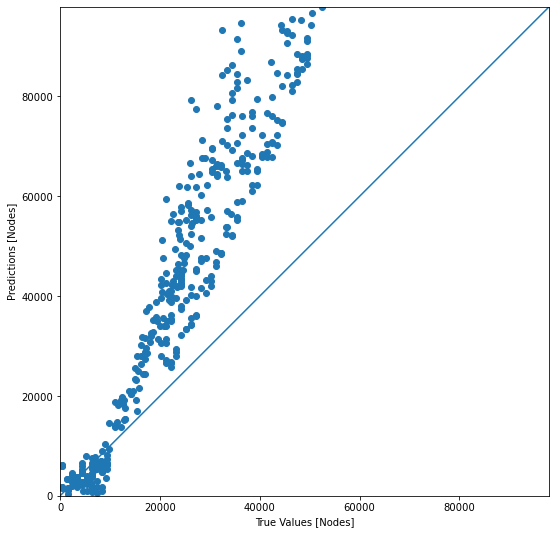

In [141]:
a = plt.axes(aspect='equal')
plt.scatter(test_labels, test_predictions)
plt.xlabel('True Values [Nodes]')
plt.ylabel('Predictions [Nodes]')
lims = [0, 98000]
plt.xlim(lims)
plt.ylim(lims)
plt.gcf().set_size_inches((9,9))
_ = plt.plot(lims, lims)

# Scikitlearn Regression Metrics 

In [439]:
from sklearn.metrics import explained_variance_score, mean_absolute_error

accuracy = explained_variance_score(test_labels,test_predictions)
print(f'Explained Variance : {accuracy} (1 is best, lower scores are worse )')

mae = mean_absolute_error(test_labels,test_predictions)
print(f'Mean Absolute Error: {mae}')

Explained Variance : 0.9818558460706386 (1 is best, lower scores are worse )
MAE: 121.37585683471576


In [441]:
from sklearn.metrics import max_error

my_err = max_error(test_labels,test_predictions)
print(f'Max error across dataset : {my_err} (maximum resudial error, should be low)')


Max error across dataset : 3119.0625 (maximum resudial error, should be low)


In [443]:
from sklearn.metrics import mean_squared_error

# mse = mean_squared_error(test_labels, test_predictions)
# print(f'Mean Squared Error: {mse}')

rmse = mean_squared_error(test_labels, test_predictions,squared=False)
print(f'Root Mean Squared Error: {rmse}')

Root Mean Squared Error: 317.8592672947607


In [446]:
from sklearn.metrics import r2_score

r2 = r2_score(test_labels, test_predictions)
print(f'R^2 coefficient of determination: {r2} (1 is best, can be negative if output is reverse of input)')

R^2 coefficient of determination: 0.9809607703558645 (1 is best, can be negative if output is reverse of input)


# End bookmark